In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


In [ ]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


## Exploratory Data Analysis (EDA)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


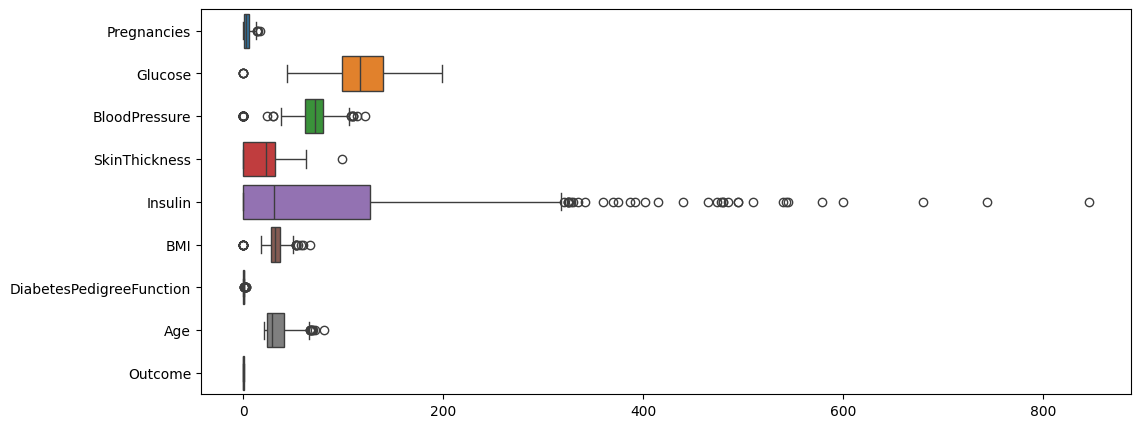

In [ ]:
# Detecting some Outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 5))
sns.boxplot(data =df, orient = 'h')
plt.show()

In [ ]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [ ]:
# Replacing 0s with the respective Means of the Columns

X.replace(to_replace = 0, value = X.mean(), inplace = True)
X.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,4.40,121.68,72.25,26.61,118.66,32.45,0.47,33.24
std,2.98,30.44,12.12,9.63,93.08,6.88,0.33,11.76
min,1.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00
25%,2.00,99.75,64.00,20.54,79.80,27.50,0.24,24.00
50%,3.85,117.00,72.00,23.00,79.80,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


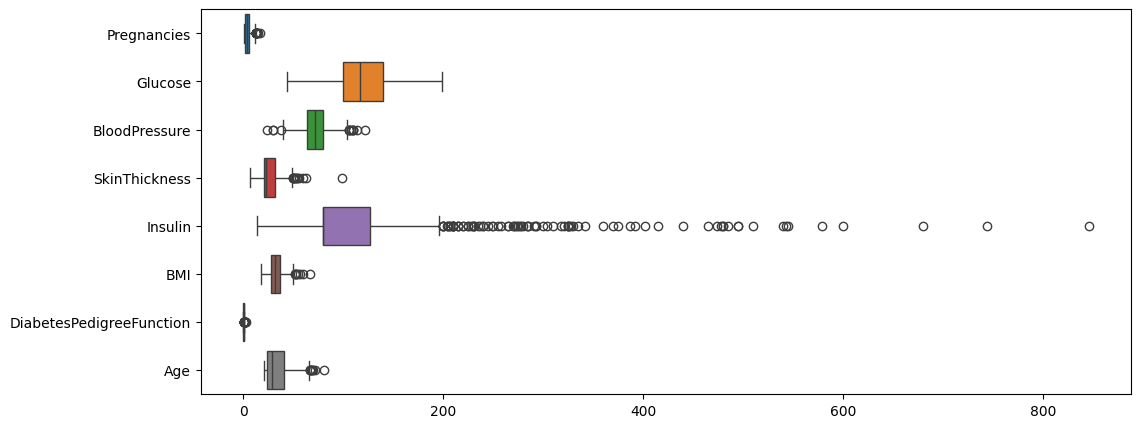

In [ ]:
plt.figure(figsize = (12, 5))
sns.boxplot(data = X, orient = 'h')
plt.show() # The lower Outliers are now (mostly) gone

## Machine Learning

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6)

In [ ]:
print(X_train.shape) # 75% of the Data
print(y_train.shape)
print("")
print(X_test.shape) # 25% of the Data
print(y_test.shape)

(576, 8)
(576,)

(192, 8)
(192,)


### Preprocessing: Normalization (Standard Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [ ]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) # We do not want it to "Understand" ('fit') the Test data, otherwise a "Data Leakage" would occur

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [ ]:
logr.fit(X_train_sc, y_train)
y_pred_logr = logr.predict(X_test_sc)

In [ ]:
print(logr.intercept_.round(3))
pd.DataFrame(logr.coef_, columns = X_train.columns).round(3)

[-0.823]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.342,1.124,-0.08,-0.07,-0.159,0.719,0.279,0.182


In [ ]:
coeffs = pd.DataFrame(logr.coef_, columns = X_train.columns).round(3)

equation = 'y = ' + str(logr.intercept_[0].round(3))

for i in coeffs.columns:
  if coeffs[i].values[0] < 0:
    equation += ' - ' + str(abs(coeffs[i].values[0])) + '*' + i
  else:
    equation += ' + ' + str(coeffs[i].values[0]) + '*' + i

print(equation)

y = -0.823 + 0.342*Pregnancies + 1.124*Glucose - 0.08*BloodPressure - 0.07*SkinThickness - 0.159*Insulin + 0.719*BMI + 0.279*DiabetesPedigreeFunction + 0.182*Age


In [ ]:
from sklearn.metrics import accuracy_score as acc

print(round(acc(y_test, y_pred_logr)*100, 2), '%') # Your Predictor Logistic Regression Model is 78% Accurate

78.12 %


In [ ]:
acc_logr = round(acc(y_test, y_pred_logr)*100, 2)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test_sc)

print(round(acc(y_test, y_pred_dt)*100, 2), '%')

69.79 %


In [ ]:
acc_dt = round(acc(y_test, y_pred_dt)*100, 2)

In [ ]:
print(acc_dt)
print(acc_logr)

69.79
78.12


In [ ]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
sample_sc = [[0, 120, 110, 21, 111, 22.0, 0.40, 20]]
print(dt.predict(sample_sc)) # Based on this Hypothetical Sample^, according to our Decision Tree Classifier, this Person will not have Diabetes!
print(logr.predict(sample_sc)) # Based on this Hypothetical Sample^, according to our Logistic Regression model, this Person will have Diabetes!

[0]
[1]
